In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df=pd.read_csv('./EV_Dataset/ElectricCarData_Clean.csv')

In [4]:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [5]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


### This Data has no null values .

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

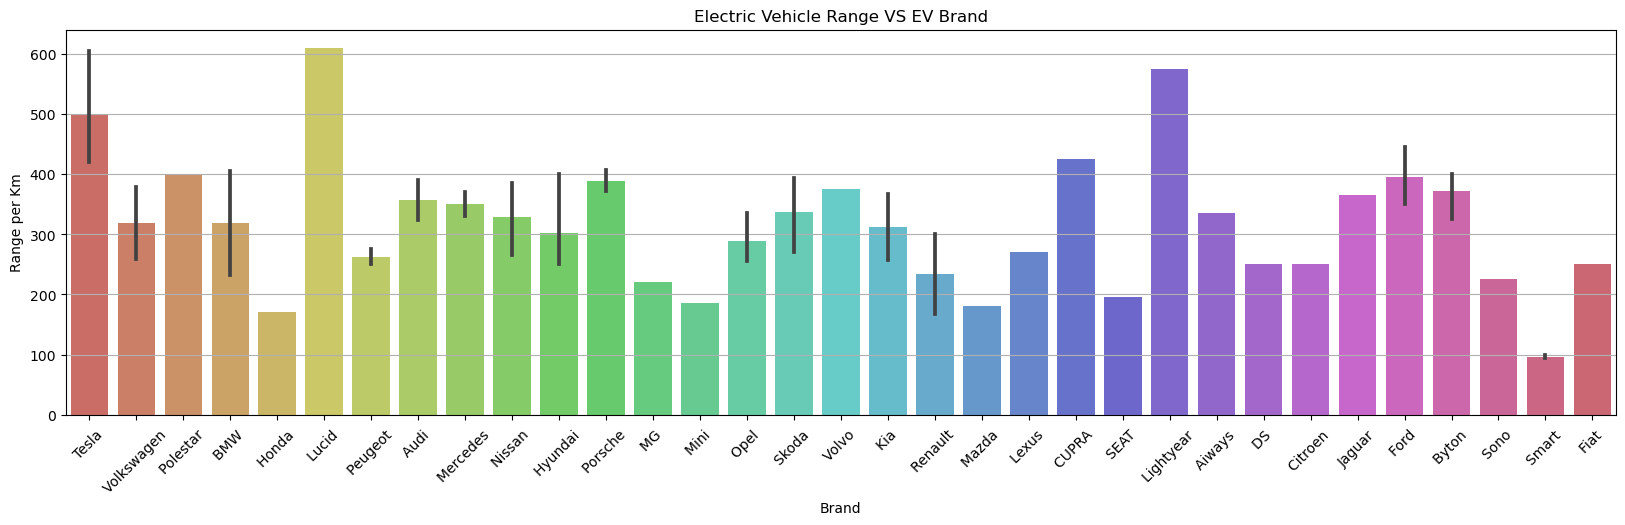

In [8]:
#Analysis on Brand Columns
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Range_Km',data=df,palette='hls')
plt.grid(axis='y')
plt.title('Electric Vehicle Range VS EV Brand')
plt.xlabel('Brand')
plt.ylabel('Range per Km')
plt.xticks(rotation=45)

Finding from Above Plot:
###### Lightyear, Lucid and Tesla have the highest Range and Smart the lowest

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

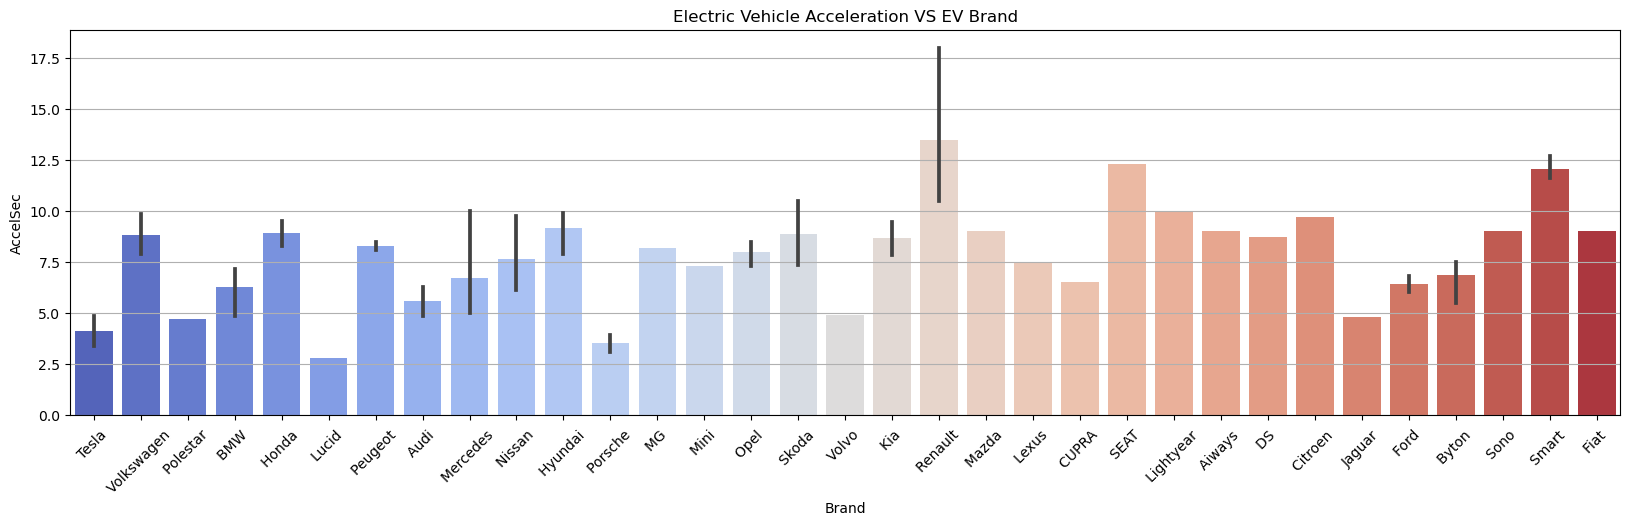

In [9]:
#Analysis acceleration by EV Brand
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='AccelSec',data=df,palette='coolwarm')
plt.grid(axis='y')
plt.title('Electric Vehicle Acceleration VS EV Brand')
plt.xlabel('Brand')
plt.ylabel('AccelSec')
plt.xticks(rotation=45)

## Finding of above plot 
Lucid, Tesla and Porsche are ranking in Top 3, they can accelerate to 60 mph (97 km/h) at very short time and Renault needs the longest time.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

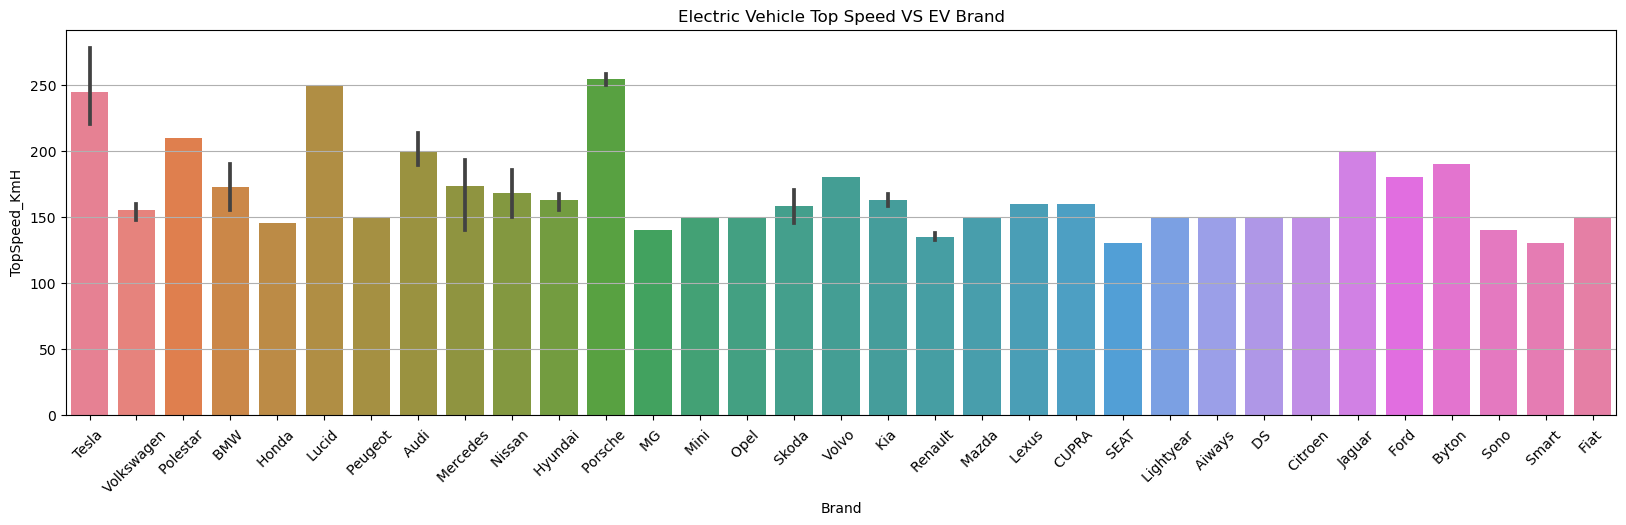

In [10]:
#Analysis top speed by EV Brand
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='TopSpeed_KmH',data=df,palette='husl')
plt.grid(axis='y')
plt.title('Electric Vehicle Top Speed VS EV Brand')
plt.xlabel('Brand')
plt.ylabel('TopSpeed_KmH')
plt.xticks(rotation=45)

#### Telsa, Porsche and Lucid have the highest Speed and Seat the lowest

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

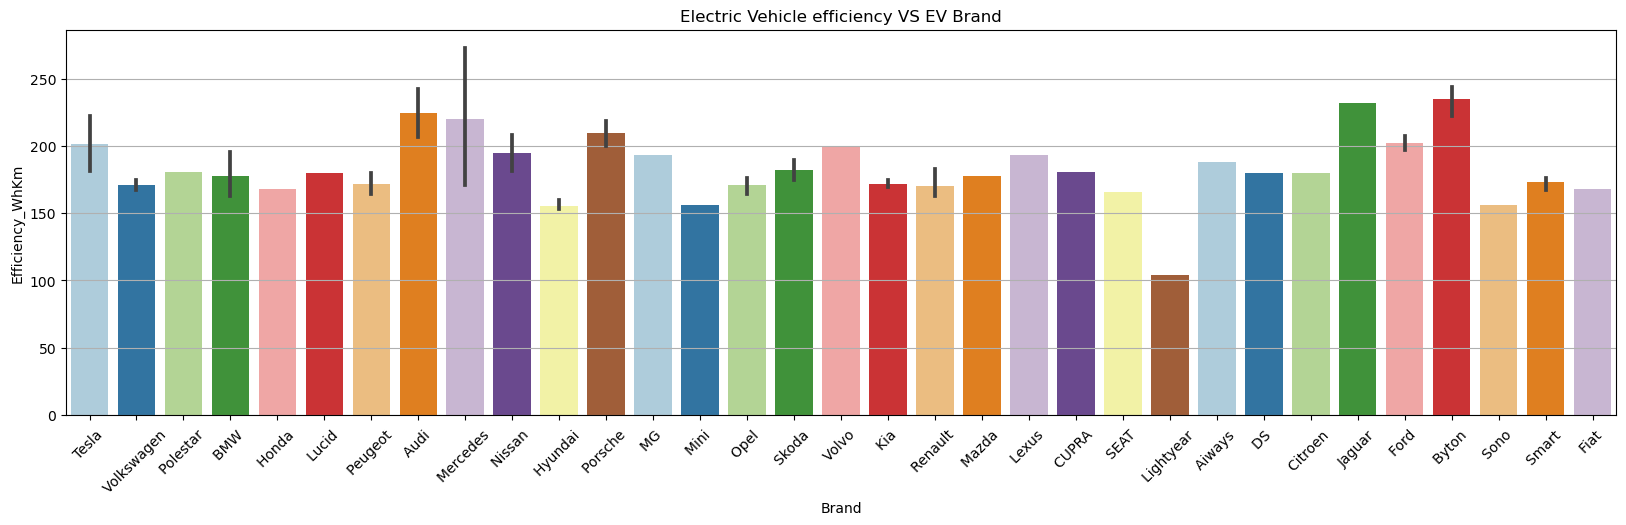

In [11]:
#Analysis efficiency by EV Brand
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Efficiency_WhKm',data=df,palette='Paired')
plt.grid(axis='y')
plt.title('Electric Vehicle efficiency VS EV Brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency_WhKm')
plt.xticks(rotation=45)

##### Mercedes, Audi and Byton have the highest efficiency and Lightyear the lowest

C:\Users\uma.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


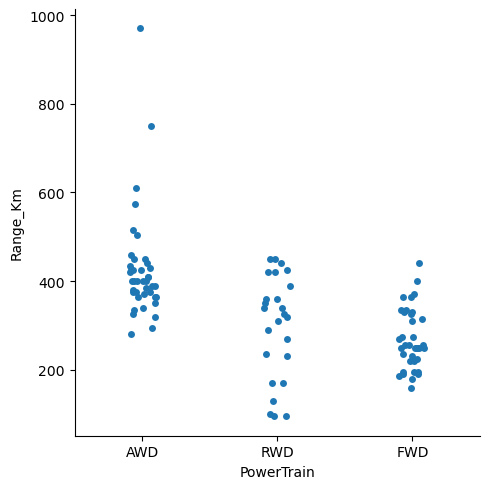

In [13]:
##Distribution of range with PowerTrain
fig, axs = plt.subplots(1,2)
sns.catplot(x="PowerTrain", y="Range_Km", data=df)
plt.close(1)

#### Encoding Categorical Data 

We will apply Ordinal Encoder .

In [14]:
ev_cat = df[['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']]

In [15]:
encoder = OrdinalEncoder()

# transform data
result = encoder.fit_transform(ev_cat)

In [16]:
result

array([[ 30.,  46.,   0.,   1.,   2.,   7.,   3.],
       [ 31.,  33.,   2.,   1.,   2.,   1.,   2.],
       [ 23.,   0.,   0.,   1.,   2.,   2.,   3.],
       [  2., 101.,   2.,   1.,   2.,   6.,   3.],
       [  9.,  78.,   2.,   1.,   2.,   1.,   1.],
       [ 15.,   4.,   0.,   1.,   2.,   7.,   5.],
       [ 31.,  83.,   1.,   1.,   2.,   1.,   2.],
       [ 22.,  81.,   1.,   1.,   2.,   1.,   1.],
       [ 30.,  48.,   2.,   1.,   2.,   7.,   3.],
       [  1.,  62.,   0.,   1.,   2.,   6.,   3.],
       [ 18.,  21.,   0.,   1.,   2.,   6.,   3.],
       [ 20.,  39.,   1.,   1.,   3.,   1.,   2.],
       [ 10.,  38.,   1.,   1.,   2.,   6.,   1.],
       [  2., 100.,   2.,   1.,   2.,   7.,   3.],
       [ 10.,  35.,   1.,   1.,   2.,   2.,   2.],
       [ 31.,  32.,   2.,   1.,   2.,   1.,   2.],
       [ 24.,  69.,   0.,   1.,   2.,   7.,   5.],
       [ 31.,  89.,   1.,   1.,   2.,   1.,   0.],
       [ 16.,  74.,   1.,   1.,   2.,   6.,   1.],
       [ 19.,  12.,   1.,   1.,

In [18]:
ev_cat.columns

Index(['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle',
       'Segment'],
      dtype='object')

In [19]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [20]:
temp = ['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']

In [21]:
df.drop(temp,axis=1,inplace=True)

In [22]:
df.columns

Index(['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm',
       'FastCharge_KmH', 'Seats', 'PriceEuro'],
      dtype='object')

In [23]:
result = pd.DataFrame(result)

In [25]:
result.columns=["Brand", "Model", "PowerTrain", 'RapidCharge', "PlugType", "BodyStyle", "Segment"]
result.index+=1

In [26]:
result

,Brand,Model,PowerTrain,RapidCharge,PlugType,BodyStyle,Segment
1,30.0,46.0,0.0,1.0,2.0,7.0,3.0
2,31.0,33.0,2.0,1.0,2.0,1.0,2.0
3,23.0,0.0,0.0,1.0,2.0,2.0,3.0
4,2.0,101.0,2.0,1.0,2.0,6.0,3.0
5,9.0,78.0,2.0,1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...
99,20.0,6.0,1.0,1.0,2.0,1.0,2.0
100,1.0,94.0,0.0,1.0,2.0,6.0,4.0
101,20.0,8.0,0.0,1.0,2.0,1.0,2.0
102,20.0,10.0,0.0,1.0,2.0,1.0,2.0


In [28]:
df

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
0,4.6,233,450,161,940,5,55480
1,10.0,160,270,167,250,5,30000
2,4.7,210,400,181,620,5,56440
3,6.8,180,360,206,560,5,68040
4,9.5,145,170,168,190,4,32997
...,...,...,...,...,...,...,...
98,7.5,160,330,191,440,5,45000
99,4.5,210,335,258,540,5,96050
100,5.9,200,325,194,440,5,50000
101,5.1,200,375,232,450,5,65000


In [29]:
ev=df
ev.index+=1

In [30]:
ev[['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']] = result[['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']]


In [31]:
df

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro,Brand,Model,PowerTrain,RapidCharge,PlugType,BodyStyle,Segment
1,4.6,233,450,161,940,5,55480,30.0,46.0,0.0,1.0,2.0,7.0,3.0
2,10.0,160,270,167,250,5,30000,31.0,33.0,2.0,1.0,2.0,1.0,2.0
3,4.7,210,400,181,620,5,56440,23.0,0.0,0.0,1.0,2.0,2.0,3.0
4,6.8,180,360,206,560,5,68040,2.0,101.0,2.0,1.0,2.0,6.0,3.0
5,9.5,145,170,168,190,4,32997,9.0,78.0,2.0,1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,7.5,160,330,191,440,5,45000,20.0,6.0,1.0,1.0,2.0,1.0,2.0
100,4.5,210,335,258,540,5,96050,1.0,94.0,0.0,1.0,2.0,6.0,4.0
101,5.9,200,325,194,440,5,50000,20.0,8.0,0.0,1.0,2.0,1.0,2.0
102,5.1,200,375,232,450,5,65000,20.0,10.0,0.0,1.0,2.0,1.0,2.0


C:\Users\uma.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


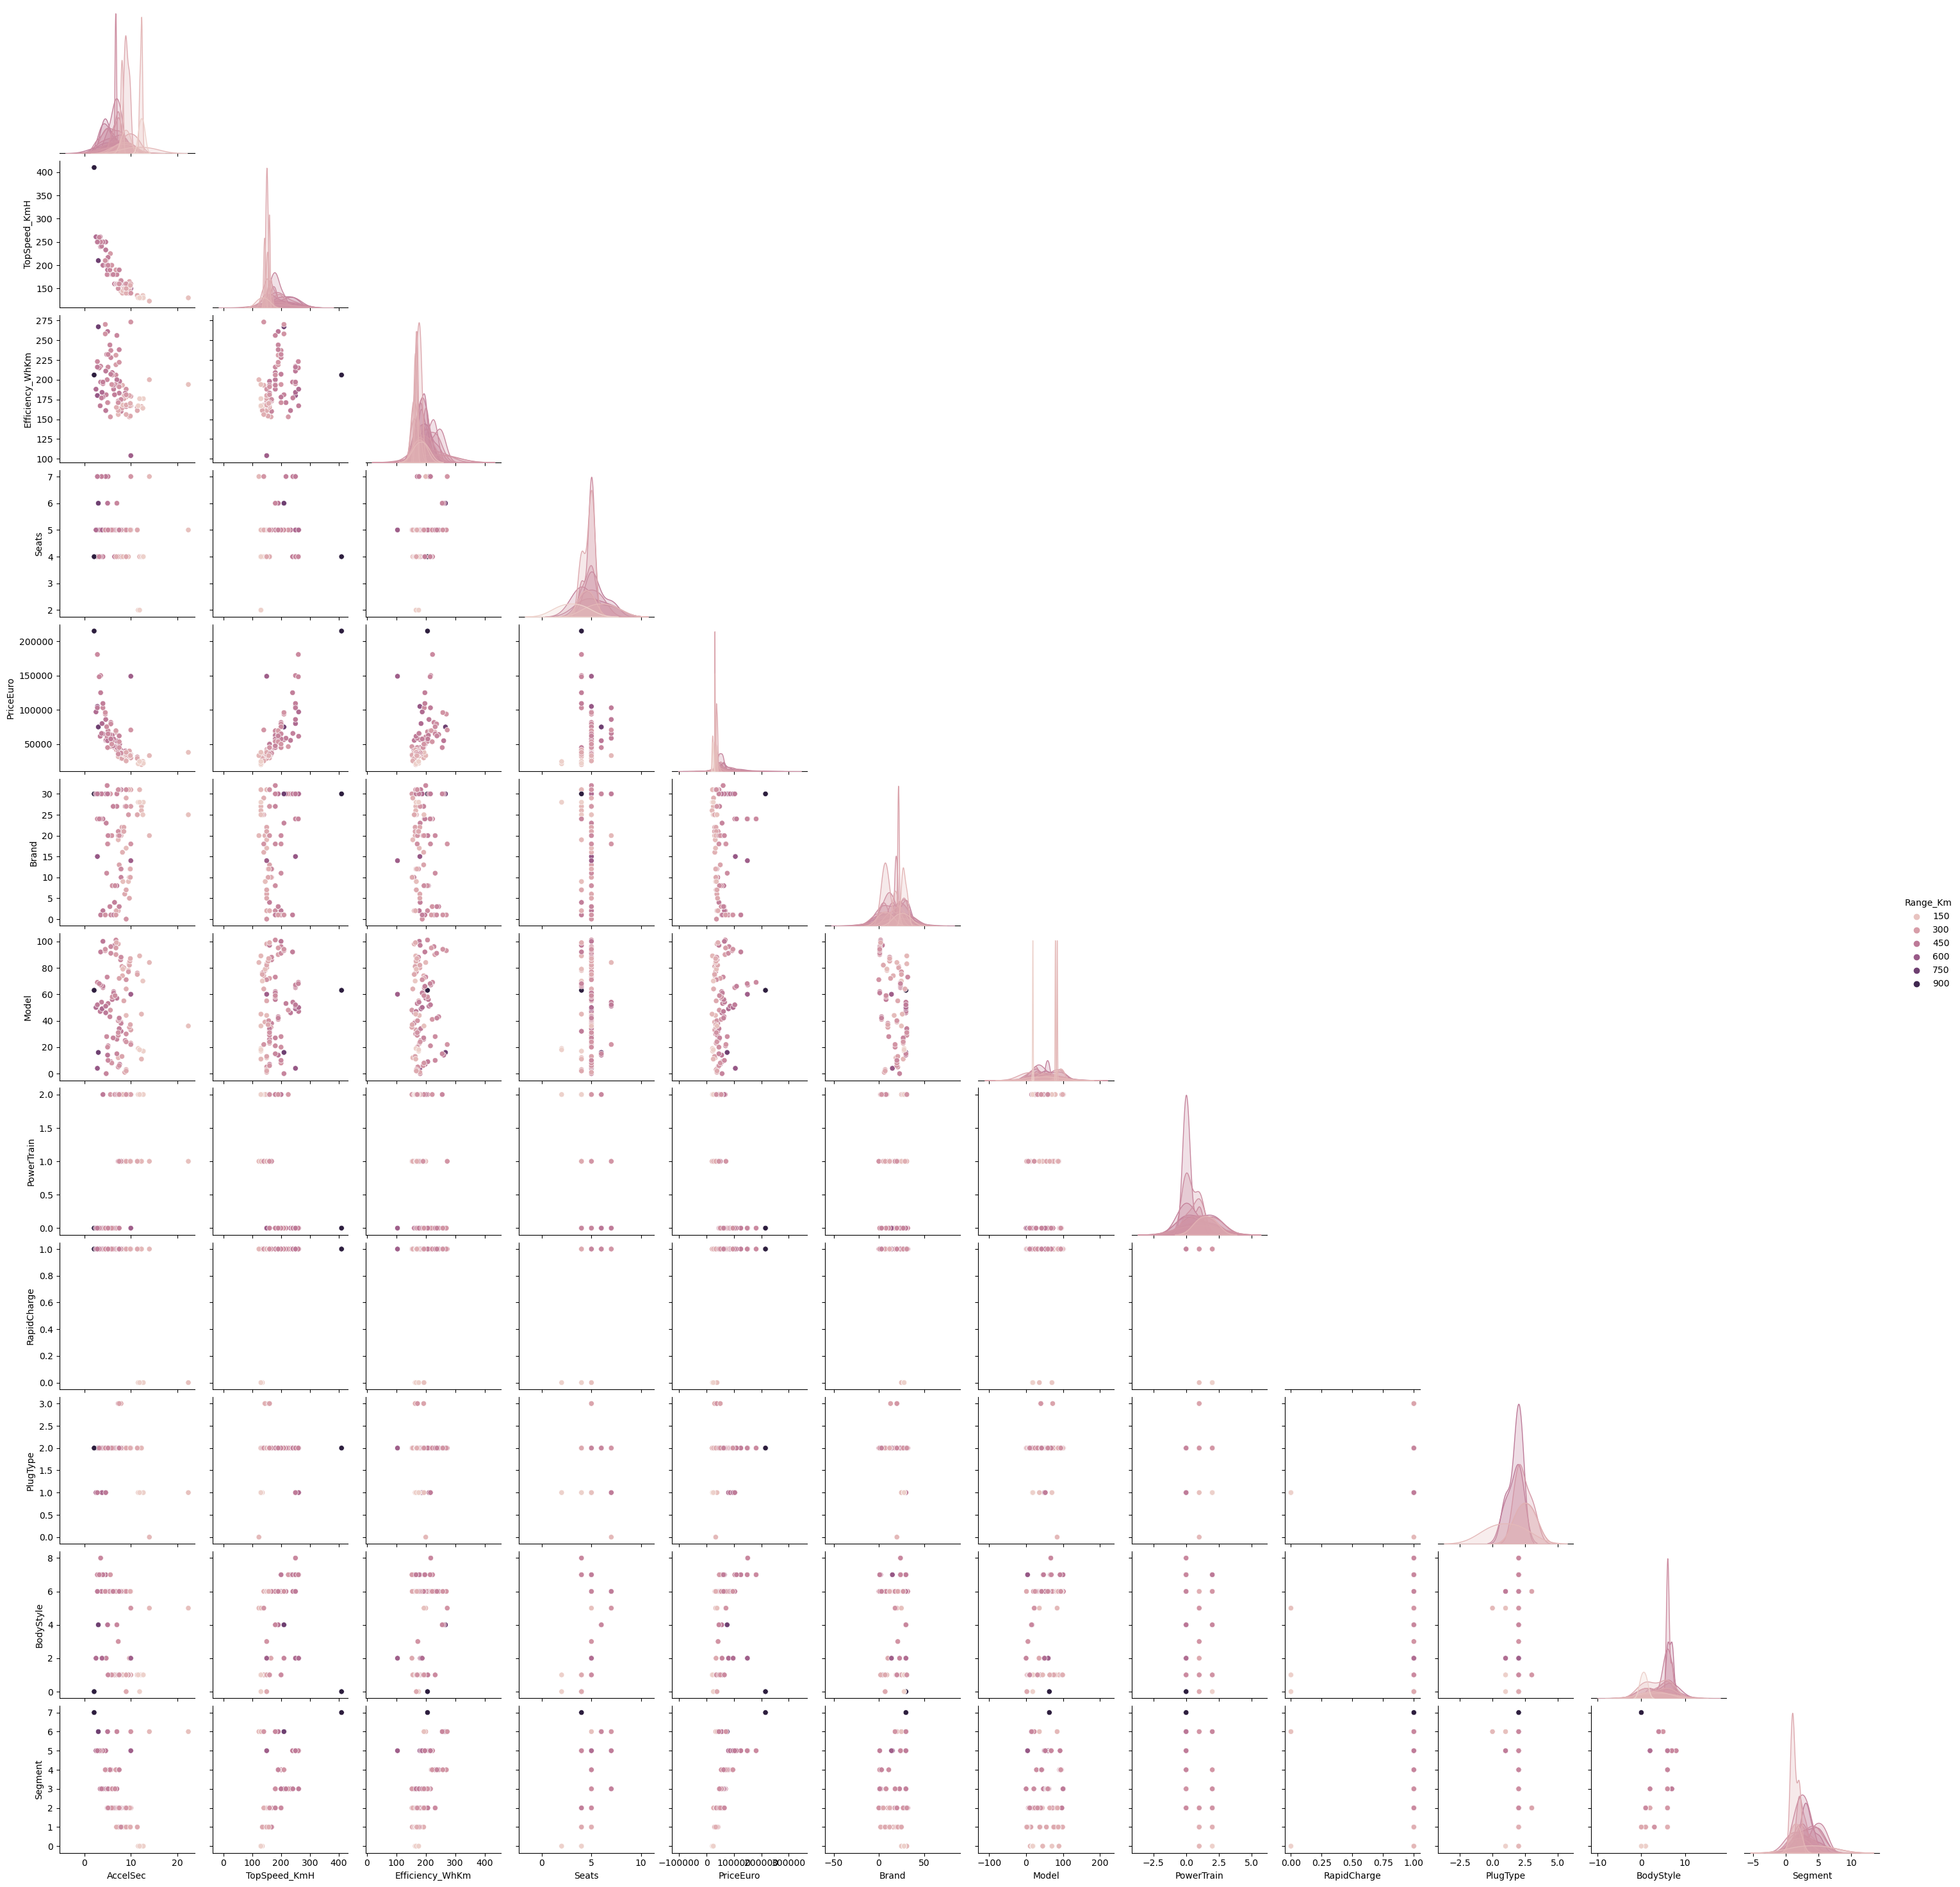

In [36]:
sns.pairplot(df,
             corner = True,
             kind = 'scatter',
             hue = 'Range_Km')
plt.show()


On finding the correlation: 
FINDING:

Electric Vehicle Range have strong positive correlation with Top Speed per Km driving. It might be sufficient to predit Electric Vehicle Range and then calculate range in Top Speed per Km.

Electric Vehicle Range have a strong negative correlation with Acceleration per second.

In [38]:
#Define the target value(dependant variable) as y
X = df['TopSpeed_KmH'].values.reshape(-1,1)
y = df['Range_Km']

### Linear Regression : MODEL 1

In [39]:
#Training and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [40]:
## Check Shape, Sample of Test Train Data
print("X_train : ",X_train.shape)

print("X_test : ",X_test.shape)

print("y_train : ",y_train.shape)

print("y_test : ",y_test.shape)

X_train :  (82, 1)
X_test :  (21, 1)
y_train :  (82,)
y_test :  (21,)


In [41]:
# Create Linear Model
lr = LinearRegression()

#Model Fitting
lr.fit(X_train, y_train)

LinearRegression()

In [42]:
#We can output a prediction
y_pred = lr.predict(X_test)
y_pred[0:5]

array([359.60303889, 359.60303889, 292.8263226 , 493.15647147,
       381.86194432])

In [43]:
#Predict the range of this EV using linear regression model.

# TopSpeed_Kmh = 248

EV_pred = lr.predict([[248]])
print(EV_pred)

[488.70469038]


In [45]:
#Check Coefficient 
lr.coef_

array([2.22589054])

In [46]:
#Check intercept
lr.intercept_

-63.3161642577993

(0.0, 1013.75)

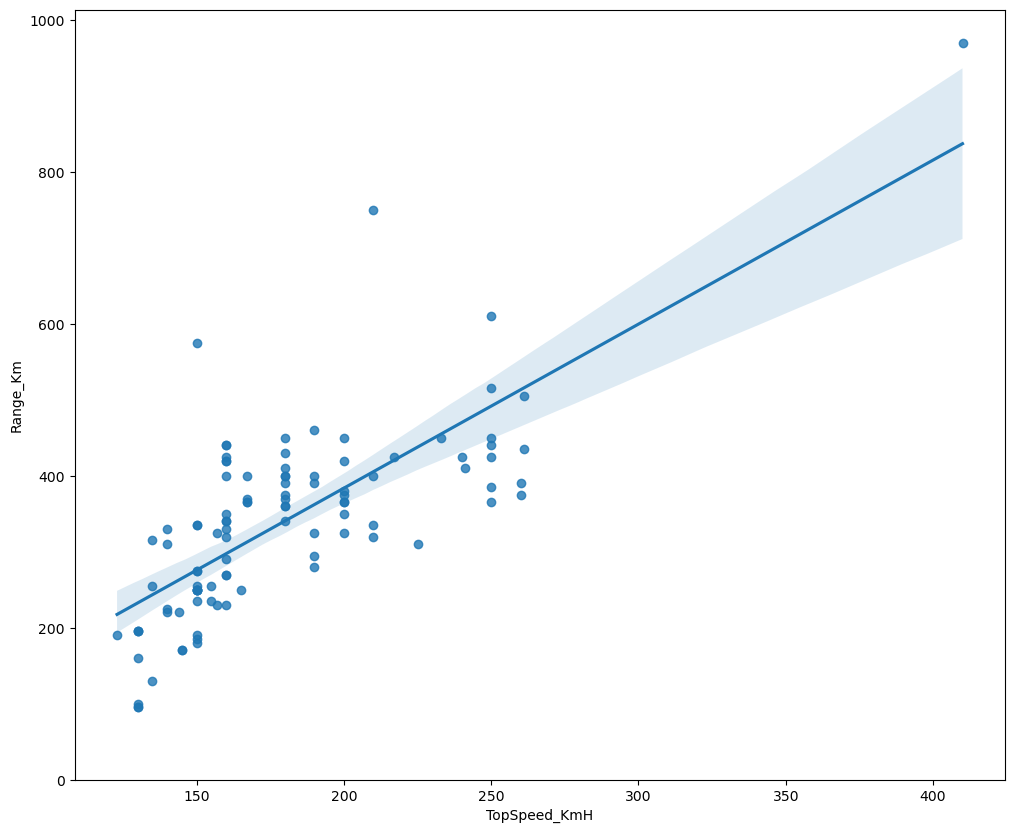

In [47]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="TopSpeed_KmH", y="Range_Km", data=ev)
plt.ylim(0,)

We can see from this plot that range is positively correlated to Top Speed per Kmh, since the regression slope is positive. If the slope is positive, y increases as x increases, and the function runs "uphill". When Top_Speed increase, the Range will increase too.

The fitted values for a linear regression model are the predicted values of the outcome variable for the data that is used to fit the model.

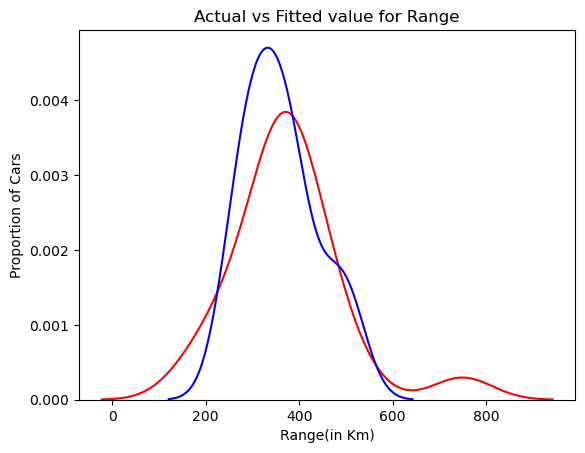

In [48]:
ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(y_pred, color="b", label="Fitted Values", ax=ax1)
plt.title('Actual vs Fitted value for Range')
plt.xlabel('Range(in Km)')
plt.ylabel('Proportion of Cars')
plt.show()
plt.close()

# Model Evaluation

In [50]:
# Calculate the score for Training Data
lr.score(X_train, y_train)
print("R2 for Training Data: ", lr.score(X_train, y_train))

R2 for Training Data:  0.6297694922844455


In [51]:
# Calculate the score (R^2 for Regression) for Testing Data
lr.score(X_test, y_test)
print("R2 for Testing Data: ", lr.score(X_test, y_test))

R2 for Testing Data:  0.15363068038695216


In [52]:
#Calculate Mean Squared Error
mean_squared_error(y_test, y_pred)
print("MSE: ", mean_squared_error(y_test, y_pred))

MSE:  11242.893676247608


In [53]:
#Calculate Mean Absolute Error(MAE)
mean_absolute_error(y_test, y_pred)
print("MAE: ",mean_absolute_error(y_test, y_pred))

MAE:  78.18137850937941


In [54]:
#Calculate Root Mean Squared Error(RMSE)

print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  106.03251235469057


In [59]:
X = df[['TopSpeed_KmH','Efficiency_WhKm','Segment','Seats','AccelSec','PriceEuro']]
# Target
y = df['Range_Km']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [61]:
## Flag intermediate output

show_steps = True   # for testing/debugging

included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the training data
n = X_train.shape[0]

r2_list = []
adjusted_r2_list = []

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train)
        
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )
        
        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for
    
    r2_list.append(best['r2'])
    adjusted_r2_list.append(best['a_r2'])

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = Efficiency_WhKm, AccelSec, Segment, PriceEuro, Seats, TopSpeed_KmH
(Step) Trying Efficiency_WhKm...
(Step) - Features = Efficiency_WhKm
(Step) - Adjusted R^2: This = 0.064; Best = 0.000
(Step) - New Best!   : Feature = Efficiency_WhKm; R^2 = 0.075; Adjusted R^2 = 0.064
(Step) Trying AccelSec...
(Step) - Features = AccelSec
(Step) - Adjusted R^2: This = 0.452; Best = 0.064
(Step) - New Best!   : Feature = AccelSec; R^2 = 0.458; Adjusted R^2 = 0.452
(Step) Trying Segment...
(Step) - Features = Segment
(Step) - Adjusted R^2: This = 0.382; Best = 0.452
(Step) Trying PriceEuro...
(Step) - Features = PriceEuro
(Step) - Adjusted R^2: This = 0.549; Best = 0.452
(Step) - New Best!   : Feature = PriceEuro; R^2 = 0.554; Adjusted R^2 = 0.549
(Step) Trying Seats...
(Step) - Features = Seats
(Step) - Adjusted R^2: This = 0.055; Best = 0.549
(Step) Trying TopSpeed_KmH...
(Step) - Features = TopSpeed_KmH
(Step) - Adjusted R^2: This = 0.625; Best = 0.549
(Step) - New Best!   : Featur

### Regularization

In [55]:
#Create a Base Model Using Linear Regression
model = LinearRegression()
# Fit
model.fit(X,y)

LinearRegression()

In [56]:
model.coef_

array([2.15936868])

In [57]:
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="coef", y="variable", data=model_coefs)
# Plot Coefficients
view_coeff(X, model)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'